## Analysointiosaamisen ohjelmointiharjoitus: aikasarjat

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

#### Avataan tiedostot, lisätään aikaleimat ja järjestetään aikajärjestykseen

In [15]:
###### Avataan tiedostot
osake = pd.read_csv('http://myy.haaga-helia.fi/~nurju/Teaching/Uuden_kehittaja/Kurssihistoria/VALMET-2014-01-02-2019-09-20.csv', sep=';', decimal=',', usecols=[0,1,2,3,4,5,6,7,8,9])
markkinat = pd.read_csv('http://myy.haaga-helia.fi/~nurju/Teaching/Uuden_kehittaja/Kurssihistoria/OMXH25-2014-01-02-2019-09-20.csv', sep=';', decimal=',', usecols=[0,1,2,3])

##### Lisätään aikaleimat
osake.index = pd.to_datetime(osake['Date'], dayfirst=True)
markkinat.index = pd.to_datetime(markkinat['Date'], dayfirst=True)

##### Järjestetään aikasarja vanhimmasta uusimpaan
osake.sort_index(inplace = True)
markkinat.sort_index(inplace = True)

In [16]:
##### Tulostetaan Valmetin kurssihistorian ensimmäiset rivit

osake.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover
Date,,,,,,,,,,
2014-01-02,2.1.2014,6.65,6.680,7.200,8.005,6.035,6.65,6.605,7135000,4.709586e+07
2014-01-03,3.1.2014,6.87,6.905,7.000,7.145,6.670,6.87,6.870,6641036,4.563087e+07
2014-01-07,7.1.2014,6.40,6.430,6.100,6.870,6.000,6.40,6.480,7467206,4.839419e+07
2014-01-08,8.1.2014,6.66,6.700,6.400,6.850,6.360,6.70,6.653,2014399,1.340119e+07
2014-01-09,9.1.2014,6.65,6.680,6.675,6.840,6.530,6.65,6.695,1190515,7.970770e+06


In [17]:
##### Tulostetaan markkinoiden (indeksin) ensimmäiset rivit

markkinat.head()

,Date,High price,Low price,Closing price
Date,,,,
2014-01-02,2.1.2014,2856.41,2810.90,2814.01
2014-01-03,3.1.2014,2840.33,2802.13,2831.83
2014-01-07,7.1.2014,2846.28,2824.78,2827.04
2014-01-08,8.1.2014,2836.53,2820.52,2826.27
2014-01-09,9.1.2014,2855.68,2832.05,2846.15


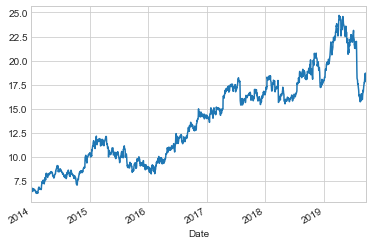

In [18]:
##### Piirretään osakkeen päätöskurssin aikasarjasta viivakuvio

osake['Closing price'].plot()

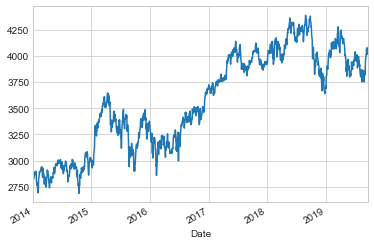

In [19]:
##### Piirretään markkinoiden päätöskurssien aikasarjasta viivakuvio
markkinat['Closing price'].plot()

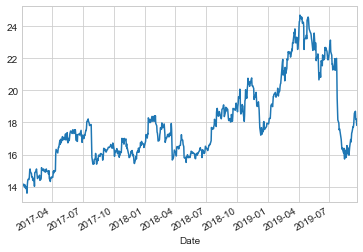

In [20]:
##### Piirretään aikasarjat vuoden 2018 alusta alkaen
##### Osakkeen päätöskurssi:

osake['Closing price']['2017-01-01':].plot()

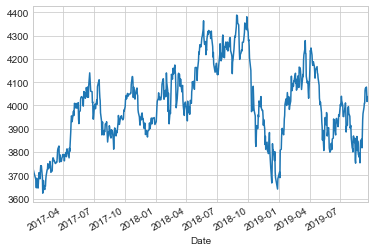

In [21]:
##### Markkinoiden päätöskurssi:

markkinat['Closing price']['2017-01-01':].plot()

#### Lasketaan erilaisia keskiarvohintoja ja esitetään ne viivakuviona

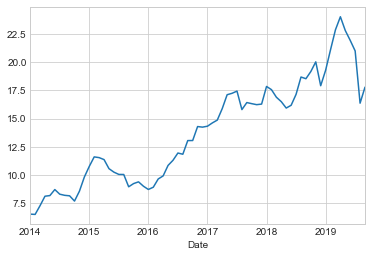

In [22]:
##### Osakkeen kuukausittaiset keskiarvohinnat

osake['Closing price'].resample('M').mean().plot()

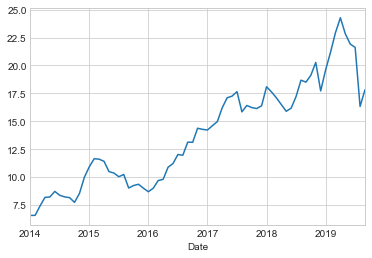

In [24]:
##### Osakkeen kuukausittaiset mediaanihinnat

osake['Closing price'].resample('M').median().plot()

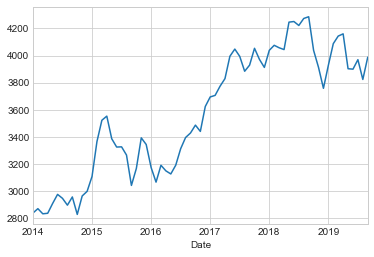

In [23]:
##### Markkinoiden (indeksi) kuukausittaiset keskiarvohinnat

markkinat['Closing price'].resample('M').mean().plot()

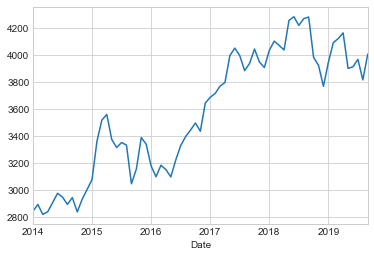

In [25]:
##### Markkinoiden (indeksi) kuukausittaiset mediaanihinnat

markkinat['Closing price'].resample('M').median().plot()

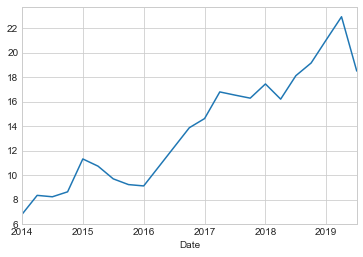

In [26]:
##### Osakkeen vuosineljännesten keskiarvohinnat

osake['Closing price'].resample('Q').mean().plot()

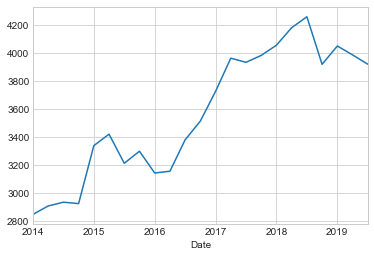

In [27]:
##### Markkinoiden vuosineljännesten keskiarvohinnat

markkinat['Closing price'].resample('Q').mean().plot()

In [32]:
##### Osakkeen vuotuiset keskiarvohinnat

# osake['Closing price'].resample('Y').mean().plot()

##### Markkinoiden vuotuiset keskiarvohinnat

# markkinat['Closing price'].resample('Y').mean().plot()

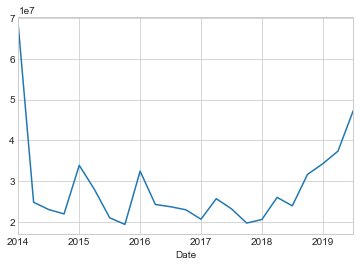

In [33]:
##### Osakkeiden vaihtojen lukumäärä vuosineljänneksittäin

osake['Total volume'].resample('Q').sum().plot()

##### Arvot ovat aivan eri suuruusluokkaa eivätkä yhdessä kuvassa noin vain näykään järkevästi:

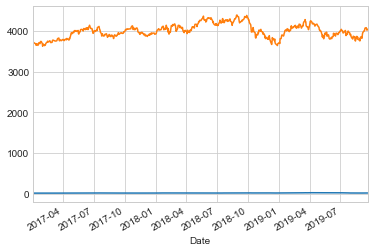

In [34]:
osake['Closing price']['2017-01-01':].plot()
markkinat['Closing price']['2017-01-01':].plot()

##### Tehdään kaksi akselia, jotta saadaan eri suuruusluokaltaan olevat asiat samaan kuvaan.
##### twinx()-funktio luo toisen axes-olion toiselle y-akselille 

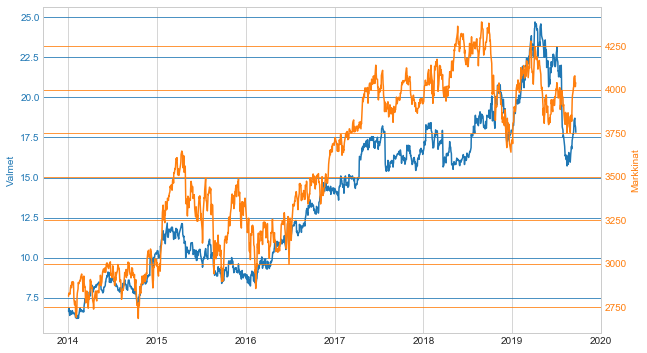

In [35]:
##### Luodaan figure- ja axes-oliot

fig1, ax1 = plt.subplots(figsize=(10,6))

##### Määritetään ax1-olio:

color = 'C0'
ax1.set_ylabel('Valmet', color=color)
ax1.plot(valmet['Closing price'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

##### Luodaan toinen axes-olio, jolla on yhteinen x-akseli ax1-olion kanssa:

ax2 = ax1.twinx()

color = 'C1'
ax2.set_ylabel('Markkinat', color=color)
ax2.plot(markkinat['Closing price'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)


### Lasketaan vielä muutosprosentteja

In [40]:
##### Lasketaan osakkeen ja markkinoiden päätöskurssien prosenttimuutokset aina edelliseen päivään

osake['Osakkeen muutos%'] = osake['Closing price'].pct_change()
markkinat['Markkinoiden muutos%'] = markkinat['Closing price'].pct_change()

In [41]:
##### Yhdistetään osakkeen ja markkinoiden muutos samaan tietokehykseen

muutokset = pd.concat([osake['Osakkeen muutos%'], markkinat['Markkinoiden muutos%']], axis=1)
muutokset.head()

,Osakkeen muutos%,Markkinoiden muutos%
Date,,
2014-01-02,NaN,NaN
2014-01-03,0.033083,0.006333
2014-01-07,-0.068413,-0.001691
2014-01-08,0.046875,-0.000272
2014-01-09,-0.007463,0.007034


Text(0.5, 0, 'Tarkasteluaika')

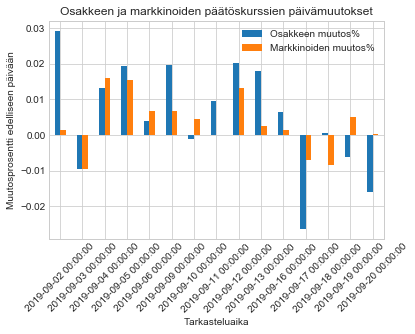

In [54]:
##### Tehdään muutoksista syyskuun 2019 alusta alkaen pylväskaavio

##### Syyskuun alusta ja vaaka-akselin teksti 45 asteen kulmassa

ax3 = muutokset['2019-09-01':].plot.bar(rot=45)

##### Pystyakselin otsikko

ax3.set_ylabel('Muutosprosentti edelliseen päivään')

##### Kuvion otsikko

ax3.set_title('Osakkeen ja markkinoiden päätöskurssien päivämuutokset')

##### Vaaka-akselin otsikko

ax3.set_xlabel('Tarkasteluaika')